In [9]:
import pandas as pd
import json
import numpy as np


In [10]:
df_benefits = pd.read_json("benefits_transformed.json")
df_benefits = df_benefits.dropna(subset=['embeddings'])
len(df_benefits)


61

In [11]:
# load task_transformed.json
with open('benefits_transformed.json') as json_file:
    data = json.load(json_file)

# save all embeddings in a 2d array
embeddings = []

for task in data:
    if task['embeddings'] is not None:
        embeddings.append(task['embeddings'])

# convert embeddings to numpy array
X = np.array(embeddings)
X.shape

<class 'list'>


(61, 1536)

In [12]:
#standardize data
sta_X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

In [13]:
#standardize X
from sklearn.preprocessing import StandardScaler
# X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
scaler = StandardScaler()
scaler.fit(X)
standartized_dataset = scaler.transform(X)
print(standartized_dataset)
print(np.mean(standartized_dataset,axis=0))
print(np.std(standartized_dataset,axis=0))


[[ 0.32427551  1.79142821 -0.27771692 ... -1.87200955  0.48848551
   0.10178064]
 [ 0.89455348 -1.04138614  0.65179605 ...  1.83046554 -0.50152268
   1.74734517]
 [ 0.07545402 -0.51662202 -0.84614218 ... -0.35287671 -0.94459675
  -0.92202986]
 ...
 [ 0.2132171  -0.66903364 -0.41800281 ... -0.77422603 -0.73044355
  -1.09750261]
 [-0.78968245 -0.29016151  0.61902535 ...  1.31996137  1.13173787
  -0.46570028]
 [-0.39197895 -1.60521681 -1.20640732 ... -0.83024846  0.52932507
   0.92307471]]
[ 1.35592812e-16 -1.34682793e-16 -3.27606794e-16 ...  2.36604907e-17
  2.05664265e-16 -6.80694117e-16]
[1. 1. 1. ... 1. 1. 1.]


In [619]:
X.shape

(87, 1536)

In [622]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


In [623]:
#get pca percentage
pca.explained_variance_ratio_

array([0.12651224, 0.10052928])

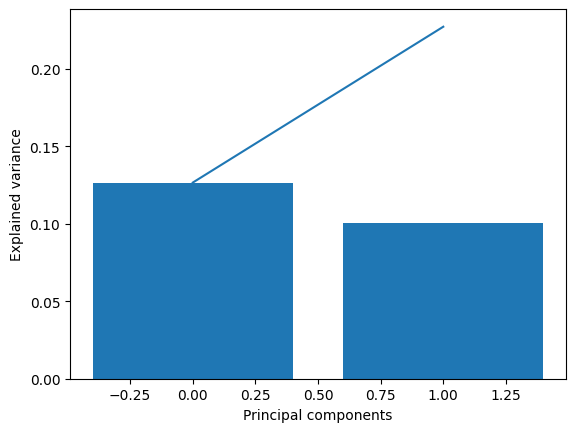

In [624]:
#scree plot
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# display bar plot too
plt.bar(range(2), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.show()

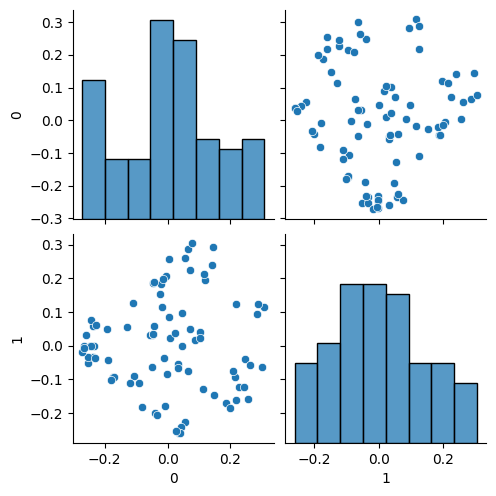

IndexError: index 2 is out of bounds for axis 1 with size 2

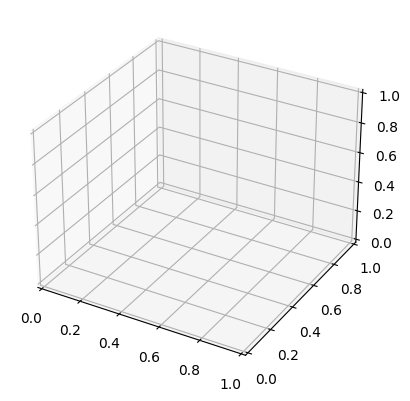

In [625]:
import seaborn as sns
import matplotlib.pyplot as plt

#pairplot
sns.pairplot(pd.DataFrame(X_pca))
plt.show()

#3d plot
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=X_pca[:,2], cmap='Greens')
plt.show()



In [626]:
X = np.vstack(X_pca)

In [627]:
X

array([[ 2.27890185e-01, -1.23760142e-01],
       [-1.76947673e-02,  1.14696521e-01],
       [-6.37626398e-03,  2.06068058e-01],
       [ 1.19928554e-01,  1.96291641e-01],
       [ 6.38328531e-02,  2.87209894e-01],
       [-2.54140434e-02,  1.53457279e-01],
       [-2.04222562e-02,  1.83580387e-01],
       [ 2.17342300e-01,  1.23729099e-01],
       [ 5.62587316e-02, -2.25748740e-01],
       [ 3.73659165e-02, -2.60072410e-01],
       [-1.72244363e-01, -9.40266412e-02],
       [ 2.13302324e-01, -9.40244170e-02],
       [ 2.47384876e-01, -3.90914832e-02],
       [-4.06995713e-02, -2.01241773e-01],
       [-2.67150180e-01, -2.84645904e-04],
       [-2.54175511e-01, -5.19587185e-02],
       [-5.05044595e-02,  3.10007002e-02],
       [-1.90219091e-01, -4.25114978e-02],
       [-2.59054840e-01,  3.31890124e-02],
       [ 8.81758492e-02,  1.66971116e-02],
       [-4.93322880e-02, -6.41187067e-02],
       [-3.28559104e-03, -8.46274265e-02],
       [-1.00732947e-02, -3.60335229e-02],
       [-5.

kmeans.fit(X)
dbscan.fit(X)
predict = dbscan.fit_predict(X)
from sklearn.metrics import silhouette_score

silhouette_score(X, predict)

In [632]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

kmeans = KMeans(n_clusters=5,random_state=0,n_init="auto")
dbscan = DBSCAN(eps=11
                , min_samples=5)
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=.05)
kmeans.fit(X)
predict = kmeans.fit_predict(X)

from sklearn.metrics import silhouette_score

silhouette_score(X, predict)

0.4888766949353026

predict = kmeans.fit_predict(X)

In [629]:
result = df_benefits[["id","tasks"]]
result['cluster'] = predict

#spread X to 3 columns and add to result
result['x1'] = X[:,0]
result['x2'] = X[:,1]
# result['x3'] = X[:,2]

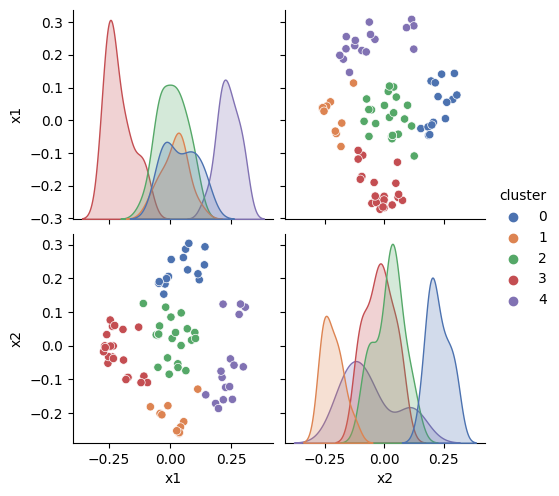

In [630]:
#plot clusters
import seaborn as sns
import matplotlib.pyplot as plt

#pairplot x,y,z, cluster
sns.pairplot(result[['x1','x2','cluster']], hue="cluster", palette="deep")
plt.show()


In [577]:
result.loc[result['cluster'] == 1]

,id,tasks,cluster,x1,x2
10,8,More customization options for reading settings,1,5.164005,-19.676457
12,10,Add more customization options for the reader ...,1,3.473619,-22.774606
16,13,Add more customization options,1,-3.100222,-18.552128
40,31,Include more customization options for the rea...,1,3.976492,-21.188360
52,40,Add more features,1,-7.172815,-10.470525
53,40,Customizable options,1,-0.234730,-15.898435
59,45,Add more customization options for the reader ...,1,3.473619,-22.774606
69,51,Add more options for customization,1,-2.616326,-18.817870
84,61,Add more customization options for the reading...,1,3.683618,-22.706215
86,63,Add more features for customization,1,-6.319239,-16.790725


In [578]:
result.loc[result['cluster'] == 7]

,id,tasks,cluster,x1,x2


In [579]:
result.to_csv("test_kmeans_tasks.csv",index=False)